In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\NRservic\Desktop\Financial markets\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


To see all columns, we can use transpose function

In [5]:
data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


#### Initial data preparation

In [6]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We see that not all columns have the correct dtype, for example, TotalCharges column has to be float but it's object. 

In [7]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [8]:
data[data['TotalCharges'].isna()][['customerID','TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,NaN
753,3115-CZMZD,NaN
936,5709-LVOEQ,NaN
1082,4367-NUYAO,NaN
1340,1371-DWPAZ,NaN
3331,7644-OMVMY,NaN
3826,3213-VVOLG,NaN
4380,2520-SGTTA,NaN
5218,2923-ARZLG,NaN
6670,4075-WKNIU,NaN


If we fill nan values with zero it will not effect our model

In [9]:
data['TotalCharges'].fillna(0, inplace=True)

Let's make all column names follow the same nameing convention

In [10]:
data.columns = data.columns.str.lower().str.replace(' ','_')

In [11]:
str_columns = list(data.dtypes[data.dtypes==object].index)
for col in str_columns:
    data[col] = data[col].str.lower().str.replace(' ','_')

Churn column has "yes" and "no" variables. If we execute data['churn']=='yes' code, it will become True and False. And with astype(int) attribute we can convert it into 0 and 1.

In [12]:
data['churn'] = (data['churn']=='yes').astype(int)

Split our data into trian and test datasets

In [39]:
from sklearn.model_selection import train_test_split
train_full, test_X = train_test_split(data, test_size=0.2, random_state=1)
train_X, val_X = train_test_split(data, test_size=0.33, random_state=1)

In [92]:
train_y = train_X['churn'].values.reshape(-1,1)
val_y = val_X['churn'].values.reshape(-1,1)
test_y = test_X['churn'].values.reshape(-1,1)

#### Explotary data analysis

Firstly, we check for missing values.

In [41]:
data.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

There's no missing value. That's good

In [42]:
data['churn'].value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In our data, 1869 people churned and 5174 people didn't churn. In order to find churn rate we can divide 1521 by 5634 or use mean() funtion, which will do the same thing. 

In [43]:
global_mean = round(data['churn'].mean(),3)
global_mean

0.265

In [44]:
data.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

Let's make two lists: categorical, containing names of categorical variables and numerical, containing names of numerical variables

In [45]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents','phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [46]:
numerical = ['tenure','monthlycharges', 'totalcharges']

In [47]:
data[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

#### Feature importance

In [48]:
global_mean

0.265

In [49]:
female_mean = data[data['gender']=='female']['churn'].mean()
male_mean = data[data['gender']=='male']['churn'].mean()
print(f'Global mean: {global_mean}\ngender=female: {round(female_mean,3)}\ngender=male: {round(male_mean,3)}')

Global mean: 0.265
gender=female: 0.269
gender=male: 0.262


In [50]:
def churn_stat(column):
    data_group = data.groupby(column).churn.agg(['mean'])
    data_group['diff'] = data_group['mean'] - global_mean
    data_group['risk'] = data_group['mean']/global_mean
    return data_group

In [51]:
for i in categorical:
    display(churn_stat(i))

,mean,diff,risk
gender,,,
female,0.269209,0.004209,1.015882
male,0.261603,-0.003397,0.987183


,mean,diff,risk
seniorcitizen,,,
0,0.236062,-0.028938,0.890799
1,0.416813,0.151813,1.572878


,mean,diff,risk
partner,,,
no,0.329580,0.064580,1.243697
yes,0.196649,-0.068351,0.742072


,mean,diff,risk
dependents,,,
no,0.312791,0.047791,1.180345
yes,0.154502,-0.110498,0.583028


,mean,diff,risk
phoneservice,,,
no,0.249267,-0.015733,0.940630
yes,0.267096,0.002096,1.007911


,mean,diff,risk
multiplelines,,,
no,0.250442,-0.014558,0.945066
no_phone_service,0.249267,-0.015733,0.940630
yes,0.286099,0.021099,1.079619


,mean,diff,risk
internetservice,,,
dsl,0.189591,-0.075409,0.715438
fiber_optic,0.418928,0.153928,1.580859
no,0.074050,-0.190950,0.279433


,mean,diff,risk
onlinesecurity,,,
no,0.417667,0.152667,1.576103
no_internet_service,0.074050,-0.190950,0.279433
yes,0.146112,-0.118888,0.551366


,mean,diff,risk
onlinebackup,,,
no,0.399288,0.134288,1.506746
no_internet_service,0.074050,-0.190950,0.279433
yes,0.215315,-0.049685,0.812509


,mean,diff,risk
deviceprotection,,,
no,0.391276,0.126276,1.476514
no_internet_service,0.074050,-0.190950,0.279433
yes,0.225021,-0.039979,0.849135


,mean,diff,risk
techsupport,,,
no,0.416355,0.151355,1.571150
no_internet_service,0.074050,-0.190950,0.279433
yes,0.151663,-0.113337,0.572315


,mean,diff,risk
streamingtv,,,
no,0.335231,0.070231,1.265024
no_internet_service,0.074050,-0.190950,0.279433
yes,0.300702,0.035702,1.134724


,mean,diff,risk
streamingmovies,,,
no,0.336804,0.071804,1.270960
no_internet_service,0.074050,-0.190950,0.279433
yes,0.299414,0.034414,1.129865


,mean,diff,risk
contract,,,
month-to-month,0.427097,0.162097,1.611686
one_year,0.112695,-0.152305,0.425265
two_year,0.028319,-0.236681,0.106863


,mean,diff,risk
paperlessbilling,,,
no,0.163301,-0.101699,0.616230
yes,0.335651,0.070651,1.266607


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.167098,-0.097902,0.630560
credit_card_(automatic),0.152431,-0.112569,0.575211
electronic_check,0.452854,0.187854,1.708883
mailed_check,0.191067,-0.073933,0.721008


If diff(difference between global mean and column variable's churn mean) is negative number, it means that this group of people is not going to churn in near future

If risk(column variable's churn mean/global mean) is close to one, it means that there is no risk that those customers are going to churn.

In [52]:
churn_stat('gender')

,mean,diff,risk
gender,,,
female,0.269209,0.004209,1.015882
male,0.261603,-0.003397,0.987183


Chrun rate for females is 28% and for males is 26%. As we know global churn rate is 27%, it's very close to global churn rate and to each other. And is close to one. There is no so much different between males and females, and it's not very effective feature for churning rate.

In [53]:
churn_stat('seniorcitizen')

,mean,diff,risk
seniorcitizen,,,
0,0.236062,-0.028938,0.890799
1,0.416813,0.151813,1.572878


Chrun rate for nonseniors is 24% and for seniors is 41%. Senior citizens churn more than nonseniors citizens

In [54]:
churn_stat('partner')

,mean,diff,risk
partner,,,
no,0.329580,0.064580,1.243697
yes,0.196649,-0.068351,0.742072


People with partner churn less than people without partner. 

In [55]:
churn_stat('dependents')

,mean,diff,risk
dependents,,,
no,0.312791,0.047791,1.180345
yes,0.154502,-0.110498,0.583028


People who has dependent churn less. 

We can analyzie one by one all columns or we can use mutual_info_score to find dependency between categorical variables and target variable.

In [56]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, data['churn'])

data_mi = data[categorical].apply(calculate_mi)
data_mi = data_mi.sort_values(ascending=False).to_frame(name='Mi')
data_mi

,Mi
contract,0.098453
onlinesecurity,0.064677
techsupport,0.063021
internetservice,0.055574
onlinebackup,0.046792
paymentmethod,0.044519
deviceprotection,0.043917
streamingmovies,0.032001
streamingtv,0.031908
paperlessbilling,0.019194


As we said before gender column variables are very independent.

***Correcaltion Coefficient***

In [57]:
data[numerical].corrwith(data_train['churn']).to_frame(name='CC')

,CC
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


Tenure and churn rate are negatively correlated, which means that when tenure has higher value churn rate is smaller. 

Monthlycharges and churn rate are positivle correlated. When monthly charges are high value, churn rate is bigger.

Totalcharges are negatively correlated, which is totally reasonable, because the longer customers stays with the company, the more they have paid in total.

#### Feature engineering

***One-hot encoding for categorical variables***

In [95]:
train_dict = train_X[categorical+numerical].to_dict(orient='rows')
val_dict = val_X[categorical+numerical].to_dict(orient='rows')

c:\users\nrservic\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:1549: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(


In [96]:
train_dict[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'yes',
 'streamingtv': 'no',
 'streamingmovies': 'no',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 69,
 'monthlycharges': 66.9,
 'totalcharges': 4577.9}

In [97]:
val_dict[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'one_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'tenure': 41,
 'monthlycharges': 79.85,
 'totalcharges': 3320.75}

Column names in data frame is key and rows are values.

In [98]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

In [99]:
len(X_train[0])

45

In [100]:
len(X_val[0])

45

We vectorized rows into array, to see the column names we can use get_feature_names() funtion.

In [101]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

#### Logistic regression

To predict our customers will churn or not we will use logistic regression model

In [102]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, train_y)

c:\users\nrservic\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=1, solver='liblinear')

In [103]:
y_pred = model.predict_proba(X_val)[:,1]

In [104]:
preds = (y_pred>0.5).astype(int).reshape(-1,1)

In [105]:
(preds==val_y).mean()

0.8090322580645162

We see that 80% of prediction is right.

In [106]:
from sklearn.metrics import roc_curve

In [110]:
fpr, tpr, thresholds = roc_curve(val_y, y_pred.reshape(-1,1))

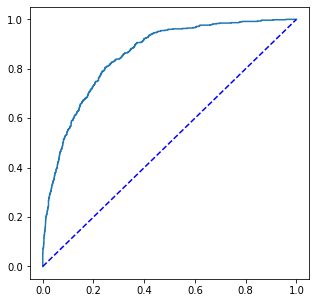

In [111]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'b--')
plt.show()

In [112]:
from sklearn.metrics import roc_auc_score

In [113]:
roc_auc_score(val_y, y_pred)

0.855619242043551

#### Let's check on the test data

In [120]:
test_dict = test_X[categorical+numerical].to_dict(orient='rows')
train_dict = train_full[categorical+numerical].to_dict(orient='rows')

X_train = dv.fit_transform(train_dict)
X_test = dv.transform(test_dict)

c:\users\nrservic\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:1549: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(


In [121]:
train_y = train_full['churn'].values.reshape(-1,1)

In [122]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, train_y)

c:\users\nrservic\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=1, solver='liblinear')

In [126]:
y_pred = model.predict_proba(X_test)[:,1]

In [127]:
preds = (y_pred>0.5).astype(int).reshape(-1,1)

In [128]:
(preds==test_y).mean()

0.8133427963094393

Here, there is also 81% accuray of our model.

In [129]:
roc_auc_score(test_y, y_pred)

0.8581350818464472